<a href="https://colab.research.google.com/github/m-aliabbas/ImageProcessing/blob/main/ImageStylizationClassicalImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Algorithms 

In [3]:
def cartoonize(image_name):
  # Reading the Image 
  image = cv2.imread(image_name)
  # Finding the Edges of Image
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  gray = cv2.medianBlur(gray, 7) 
  edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 10)
  # Making a Cartoon of the image
  color = cv2.bilateralFilter(image, 12, 250, 250) 
  cartoon = cv2.bitwise_and(color, color, mask=edges)
  return cartoon

In [11]:
def pencil_sketch(image_name):
  image = cv2.imread(image_name)
  cartoon_image1, cartoon_image2  = cv2.pencilSketch(image, sigma_s=30, sigma_r=0.3, shade_factor=0.02)  
  return cartoon_image1


In [18]:
def water_color(image_name):
  image = cv2.imread(image_name)
  res = cv2.stylization(image, sigma_s=80, sigma_r=0.6)
  return res


In [6]:
def oil_color(image_name):
  img = cv2.imread(image_name)

  # apply morphology open to smooth the outline
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
  morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

  # brighten dark regions
  result = cv2.normalize(morph,None,20,255,cv2.NORM_MINMAX)

  # write result to disk
  return result

# Visualization

In [8]:
cartoon=cartoonize('ali.jpg')

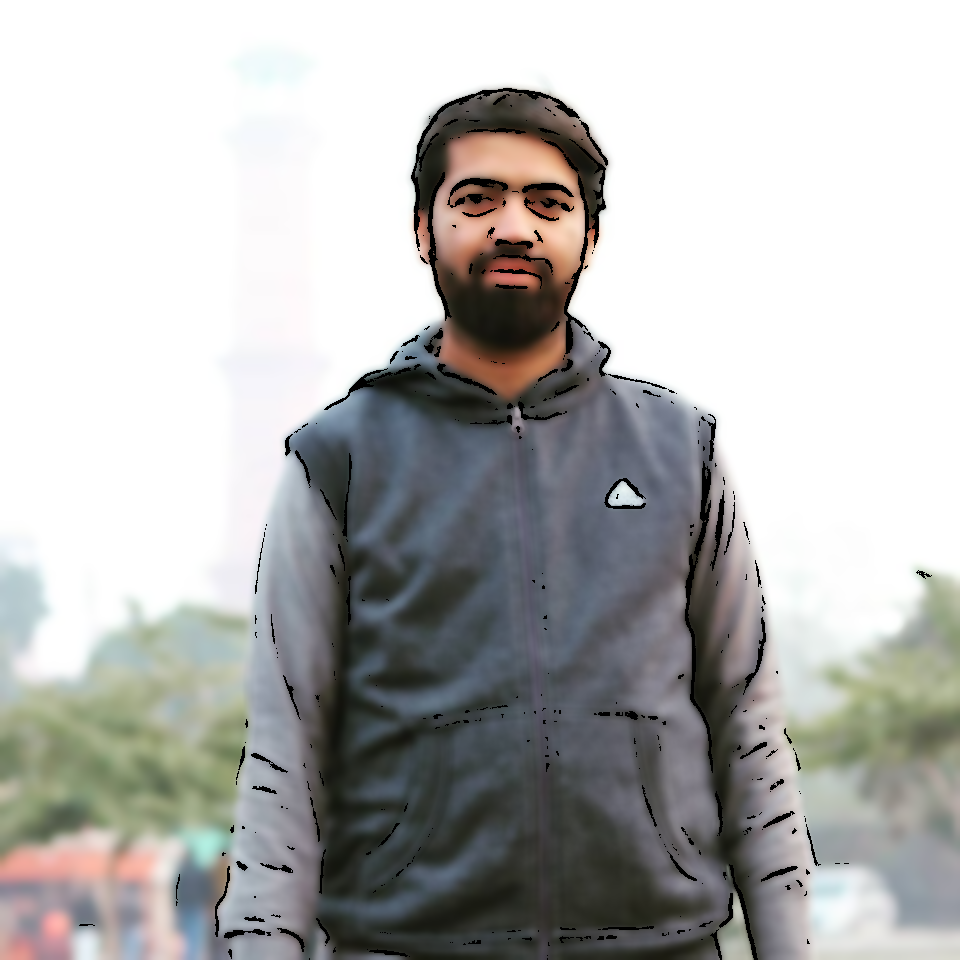

In [9]:
cv2_imshow(cartoon)

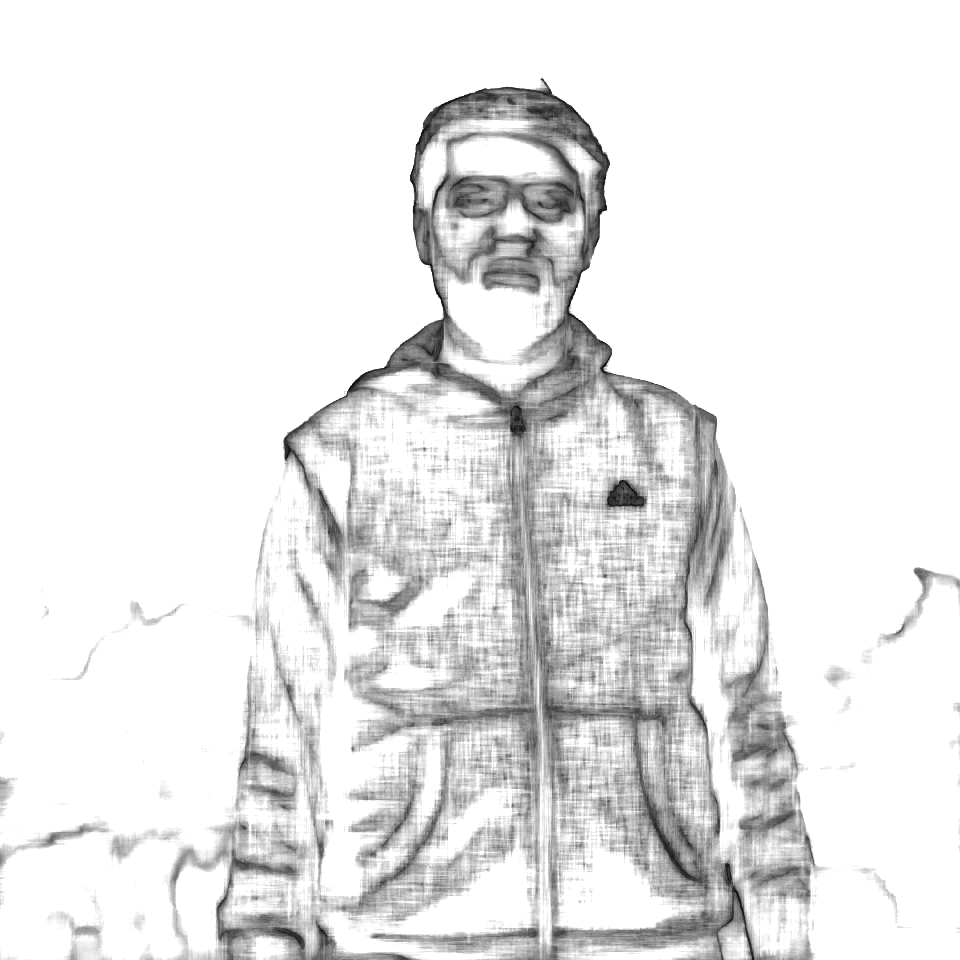

In [12]:
pencil=pencil_sketch('ali.jpg')
cv2_imshow(pencil)

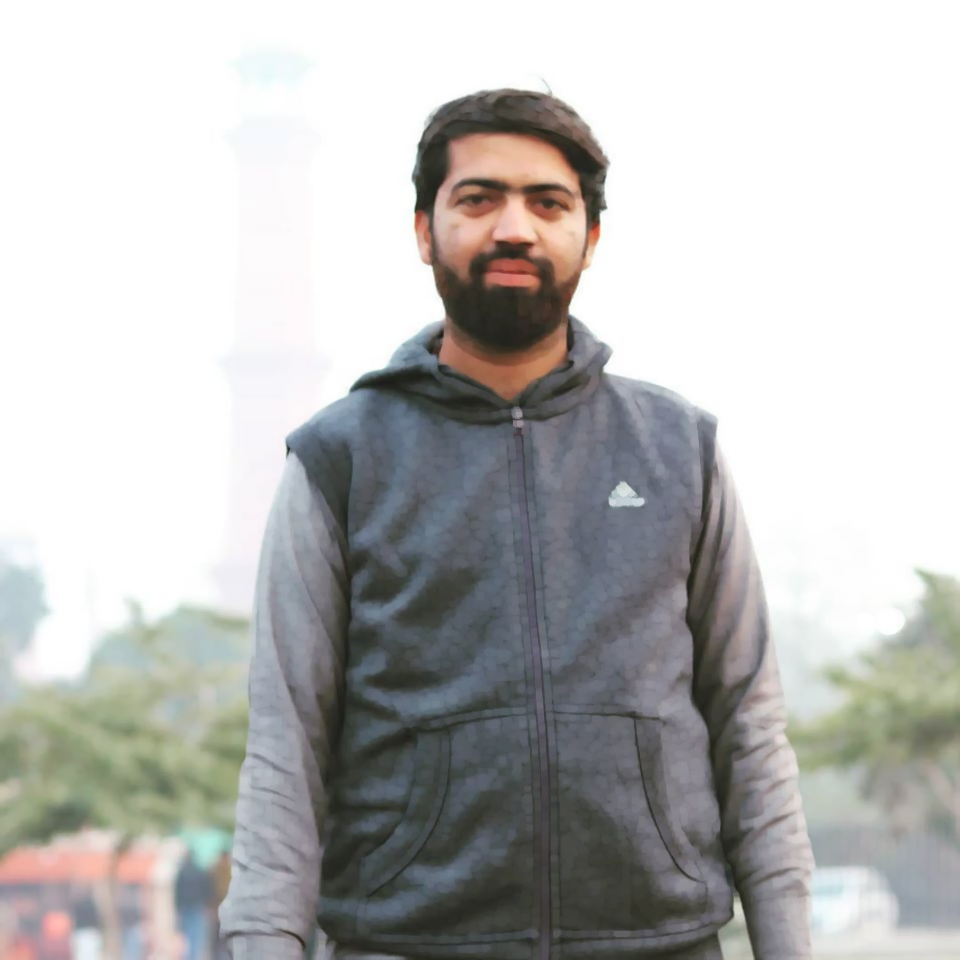

In [16]:
oilify=oil_color('ali.jpg')
cv2_imshow(oilify)

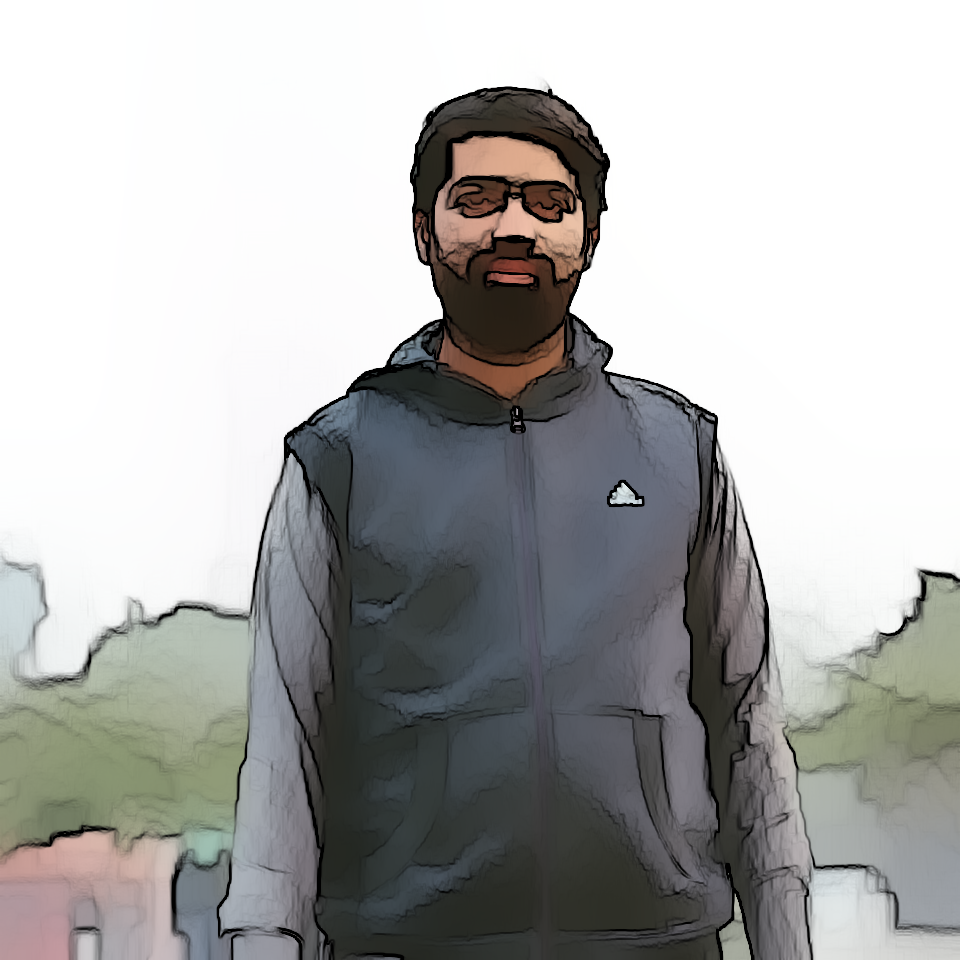

In [20]:
water=water_color('ali.jpg')
cv2_imshow(water)